<a href="https://colab.research.google.com/github/atodev/ML_Colab/blob/main/Customer_churn_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1: Data preprocessing

dataset link: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

importing the libraries and dataset

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

## Data exploration

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [9]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [10]:
dataset.isnull().values.any()

np.False_

In [11]:
dataset.isnull().values.sum()


np.int64(0)

## Encode the catagorical data

In [12]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [16]:
dataset=dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [17]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
dataset.groupby('Geography').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [26]:
dataset.groupby('Gender').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [28]:
dataset = pd.get_dummies(data=dataset,drop_first=True)

In [29]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Countplot

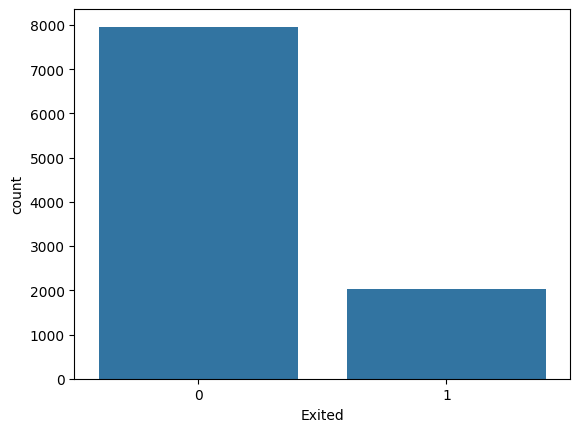

In [32]:


sns.countplot(data=dataset,x= 'Exited')
plt.show()

In [33]:
# Staying with the bank
 (dataset.Exited ==0).sum()

np.int64(7963)

In [34]:
# Exited Customers
(dataset.Exited ==1).sum()

np.int64(2037)

## Correlation matrix and Heat map

In [35]:
dataset_2 = dataset.drop(columns=['Exited'])

<Axes: title={'center': 'Correlation with Exited'}>

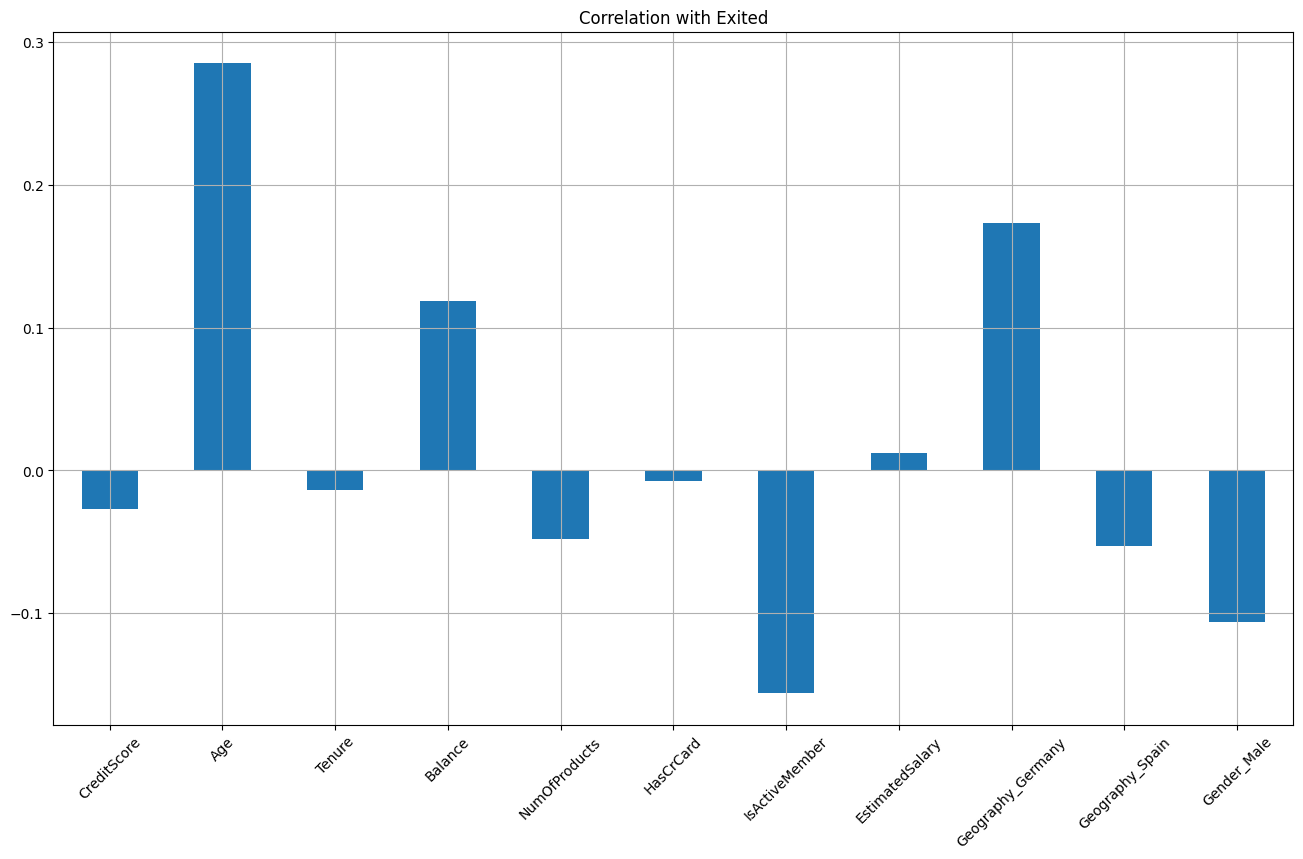

In [36]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9),
    title='Correlation with Exited',
    rot=45,
    grid=True
)

In [37]:
corr = dataset.corr()

<Axes: >

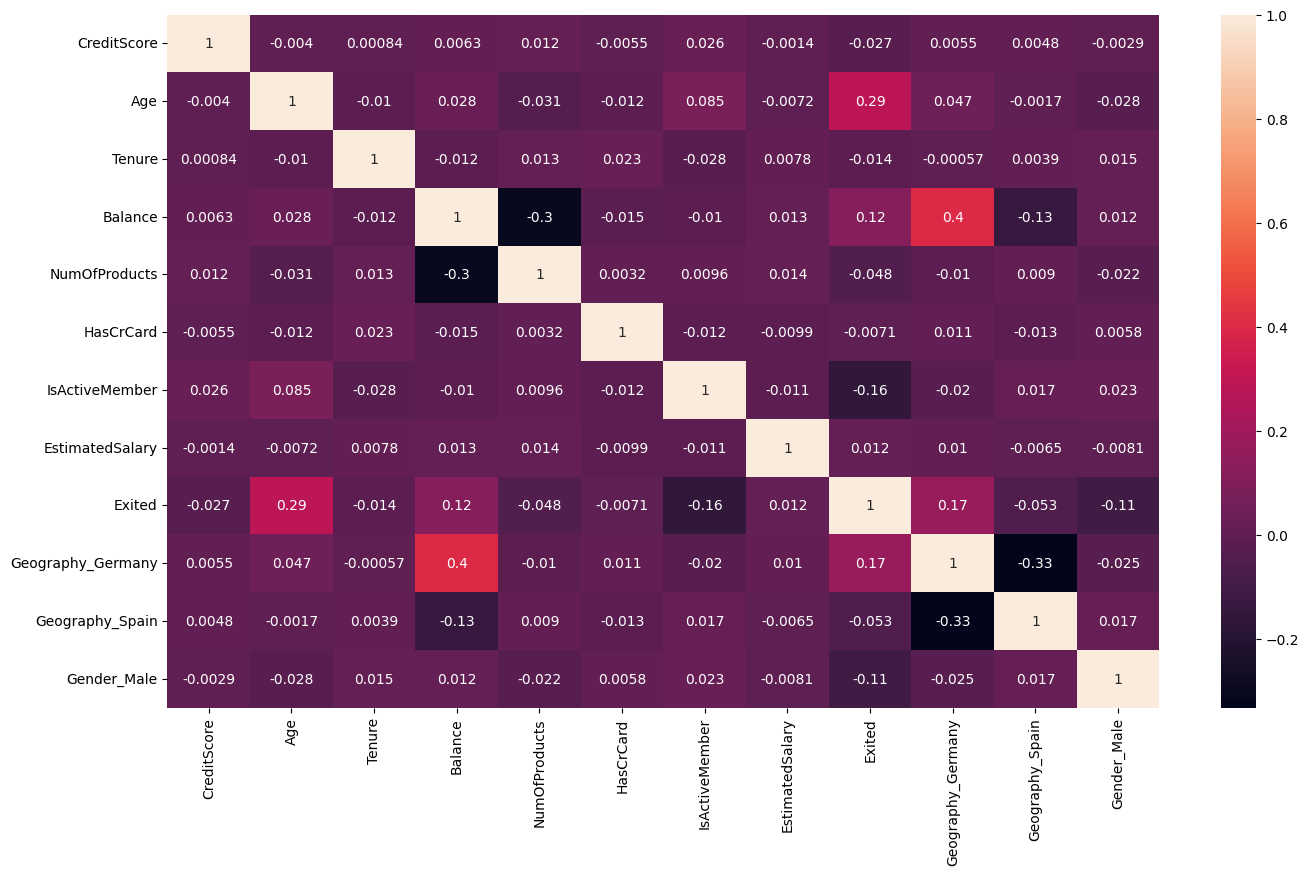

In [39]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

## Spliting the dataset

In [40]:
# independent / matrix of feature
X = dataset.drop(columns=['Exited'])
# Dependent variable
y = dataset['Exited']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
X_train.shape

(8000, 11)

In [44]:
X_test.shape

(2000, 11)

In [45]:
y_train.shape

(8000,)

In [46]:
y_test.shape

(2000,)

## Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [51]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Building the model

## 1)Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred = classifier_lr.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [55]:
acc = accuracy_score(y_test,y_pred)
f1 =f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [56]:
results = pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],
                       columns=['Model','Accuracy','F1_score','Precision','Recall'])



In [57]:
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [58]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross validation

In [59]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr,X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.85 %
Standard Deviation: 0.86 %


## 2)Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [62]:
y_pred = classifier_rf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [64]:
acc = accuracy_score(y_test,y_pred)
f1 =f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [65]:
model_results = pd.DataFrame([['Random Forest',acc,f1,prec,rec]],
                       columns=['Model','Accuracy','F1_score','Precision','Recall'])

In [66]:
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [67]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### Cross validation

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf,X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.96 %
Standard Deviation: 1.02 %


## 3)XGBoost

In [69]:
from xgboost import XGBClassifier

In [70]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred = classifier_xgb.predict(X_test)

In [72]:
acc = accuracy_score(y_test,y_pred)
f1 =f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

model_results = pd.DataFrame([['XGBoost Classifier',acc,f1,prec,rec]],
                       columns=['Model','Accuracy','F1_score','Precision','Recall'])

results = pd.concat([results, model_results], ignore_index=True)
results


,Model,Accuracy,F1_score,Precision,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classifier,0.8485,0.584362,0.657407,0.525926


In [74]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1484  111]
 [ 192  213]]


### Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb,X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.82 %
Standard Deviation: 1.31 %
